In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
crime_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
crime_data.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [8]:
crime_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9012    False
9013    False
9014    False
9015    False
9016    False
Length: 9017, dtype: bool

In [9]:
## Checking for null values
crime_data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [11]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,9017.0,2006.629034,3.463623,2001.0,2004.0,2007.0,2010.0,2012.0
MURDER,9017.0,89.285350,327.275030,0.0,18.0,38.0,66.0,7601.0
ATTEMPT TO MURDER,9017.0,78.069646,303.446020,0.0,10.0,28.0,56.0,7964.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,9017.0,9.895531,59.521657,0.0,0.0,2.0,6.0,1616.0
RAPE,9017.0,53.041366,190.741450,0.0,8.0,20.0,41.0,3425.0
CUSTODIAL RAPE,9017.0,0.005767,0.115223,0.0,0.0,0.0,0.0,5.0
OTHER RAPE,9017.0,53.035599,190.725474,0.0,8.0,20.0,41.0,3425.0
KIDNAPPING & ABDUCTION,9017.0,79.152046,317.630964,0.0,10.0,25.0,56.0,8878.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,9017.0,58.535433,246.937464,0.0,6.0,18.0,42.0,7910.0
KIDNAPPING AND ABDUCTION OF OTHERS,9017.0,20.616613,88.586415,0.0,1.0,5.0,13.0,2416.0


In [12]:
crime_data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [13]:
features=['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']
features

['MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'CUSTODIAL RAPE',
 'OTHER RAPE',
 'KIDNAPPING & ABDUCTION',
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
 'KIDNAPPING AND ABDUCTION OF OTHERS',
 'DACOITY',
 'PREPARATION AND ASSEMBLY FOR DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO THEFT',
 'OTHER THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
 'CAUSING DEATH BY NEGLIGENCE',
 'OTHER IPC CRIMES',
 'TOTAL IPC CRIMES']

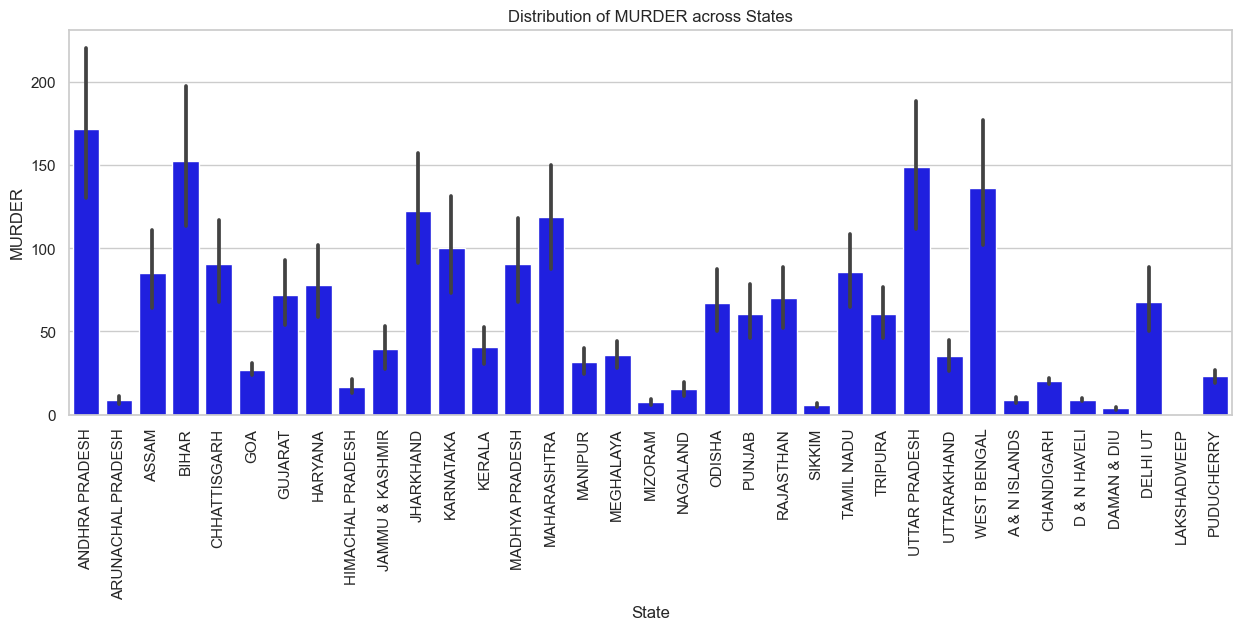

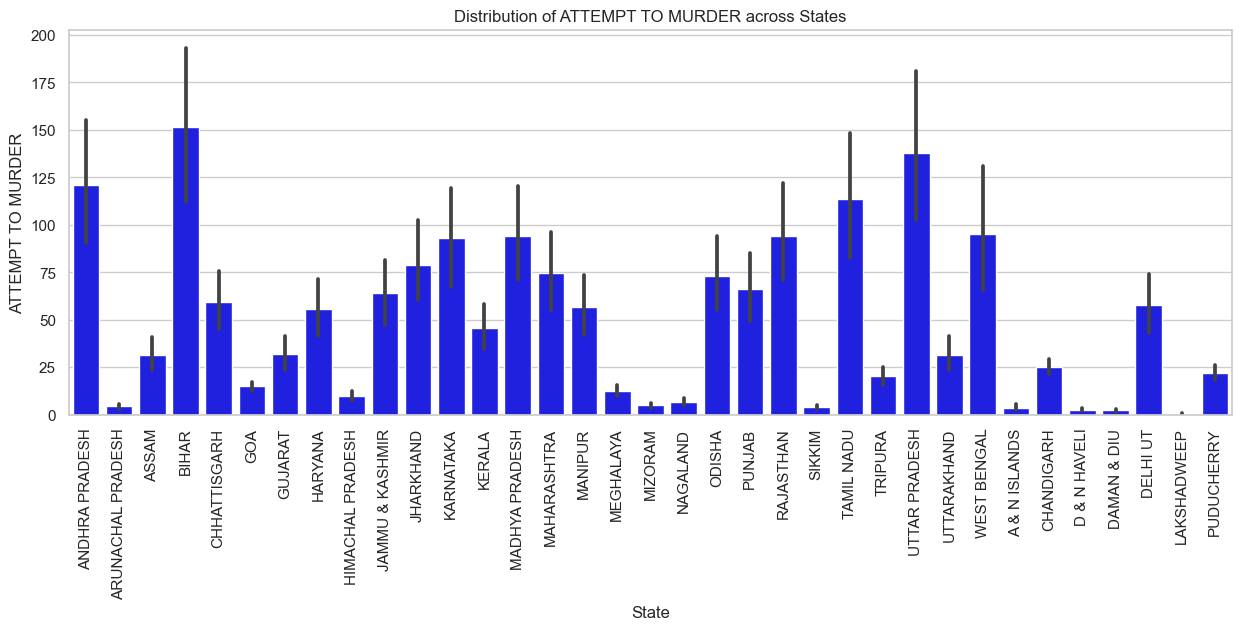

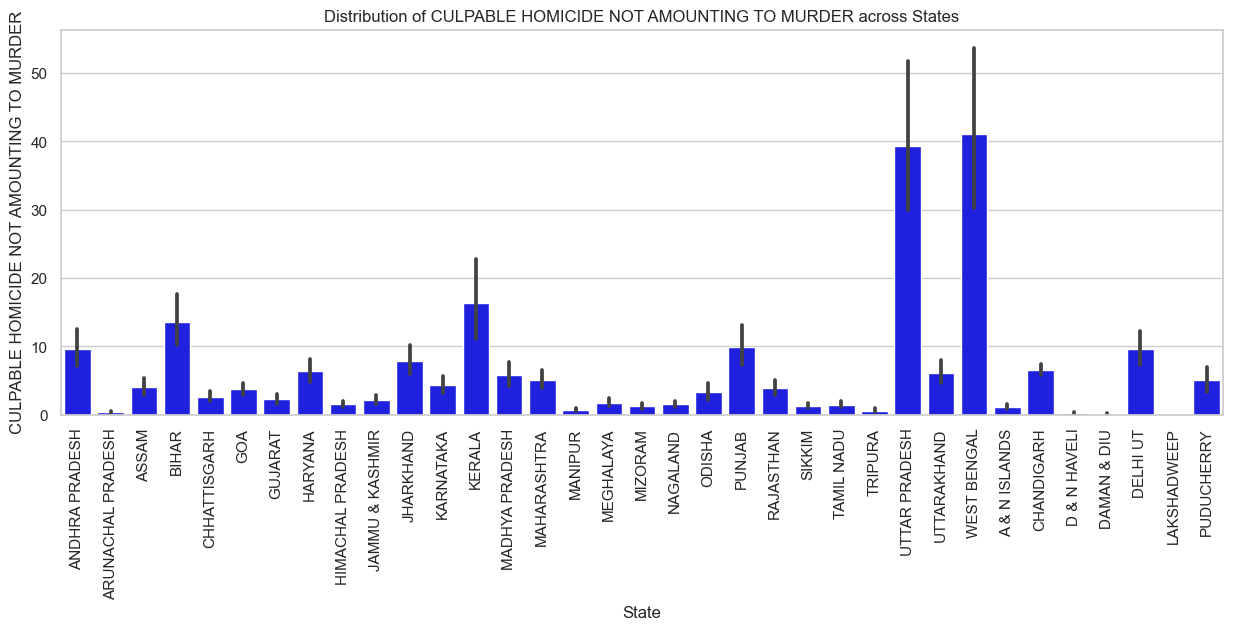

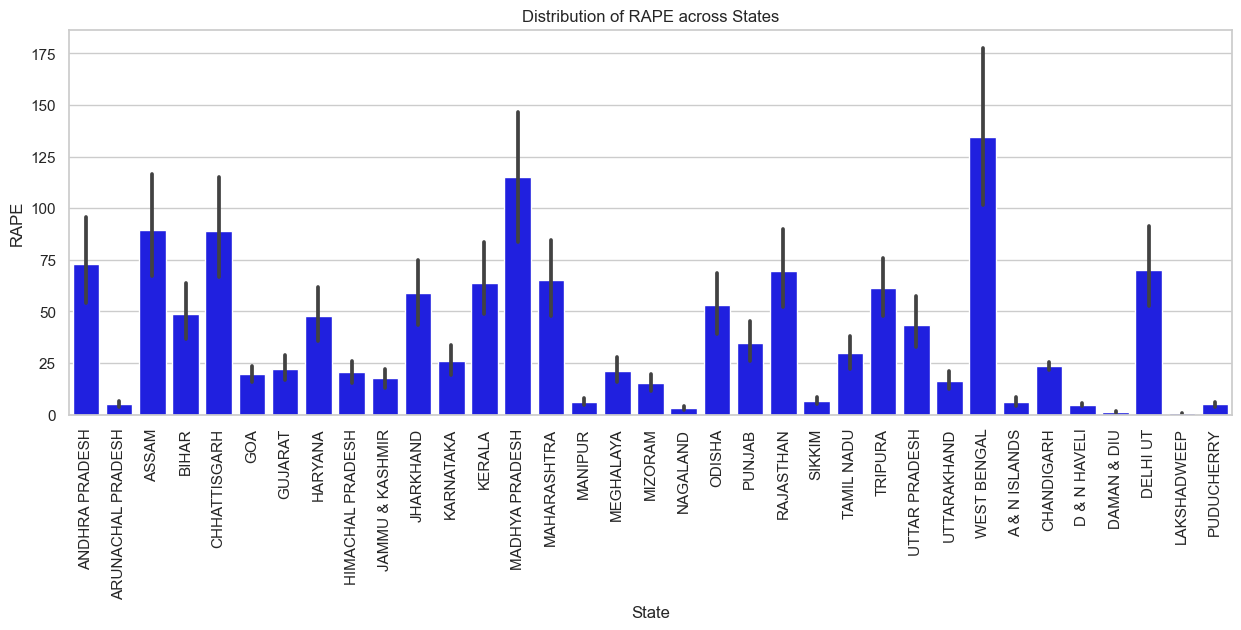

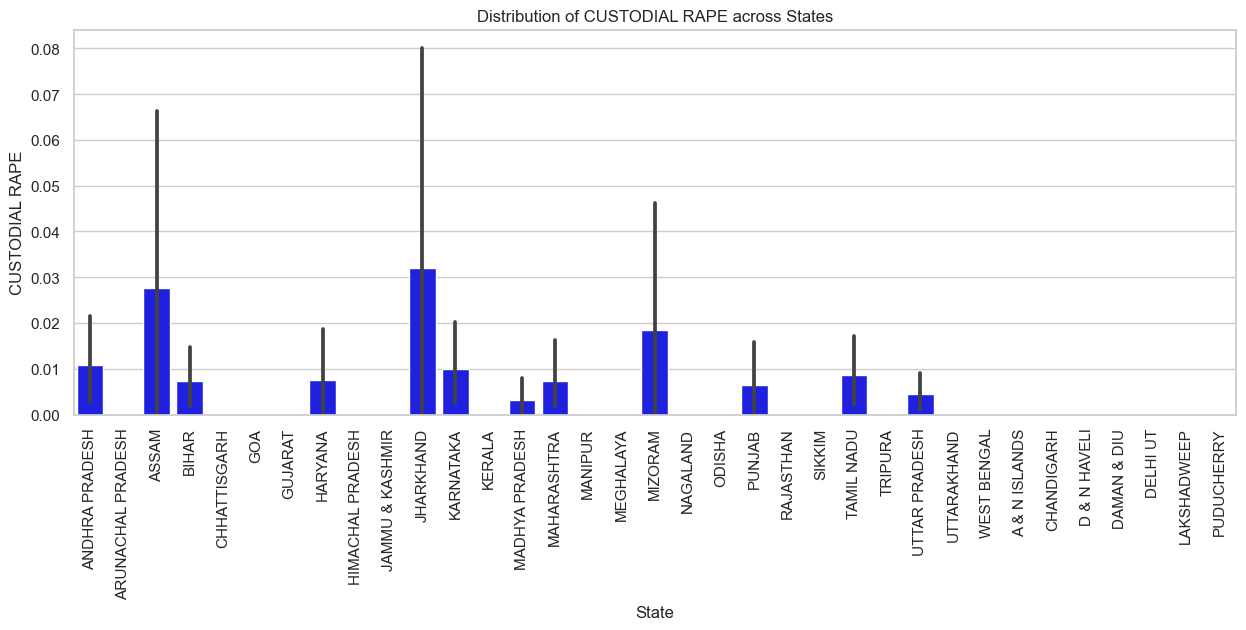

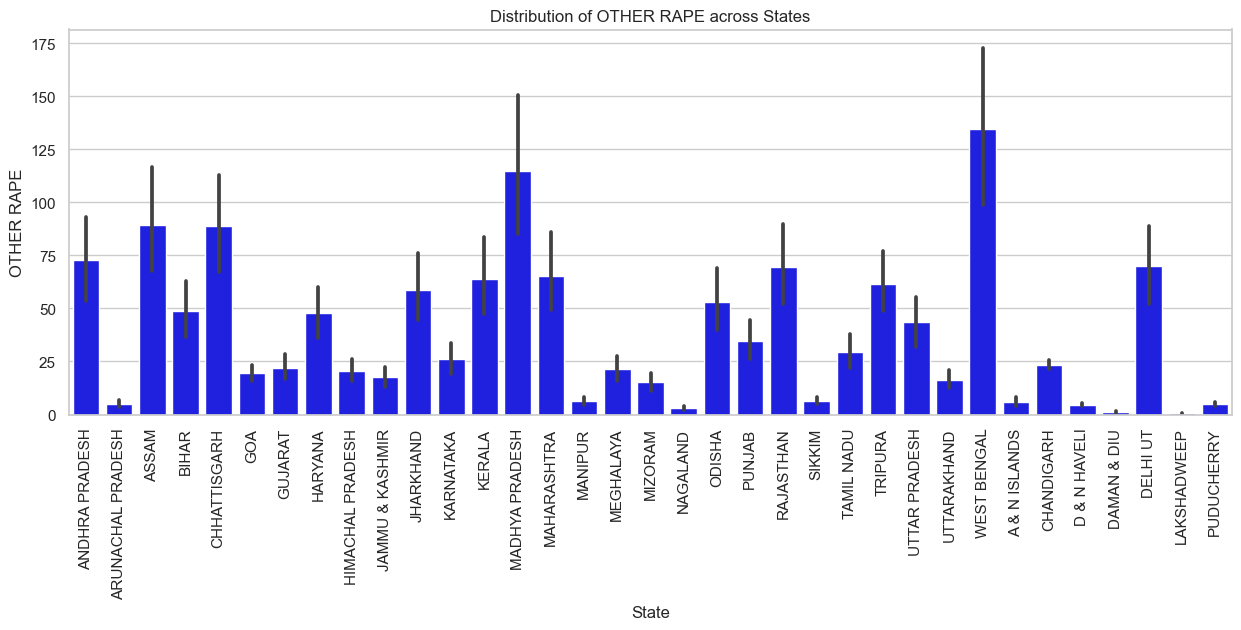

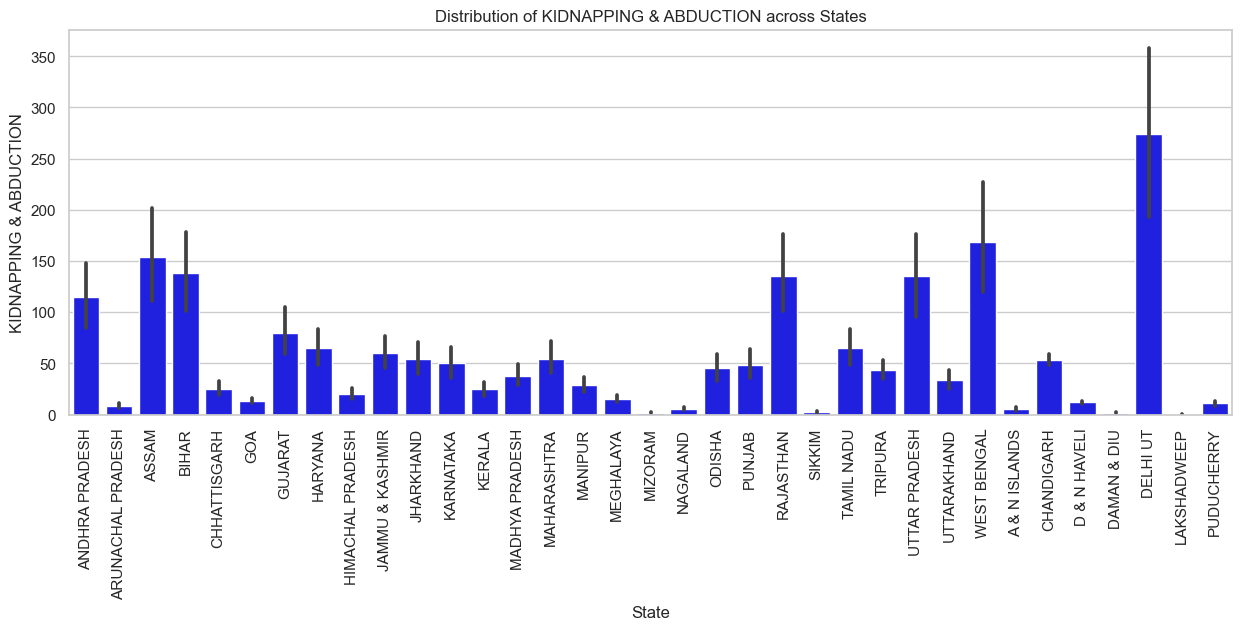

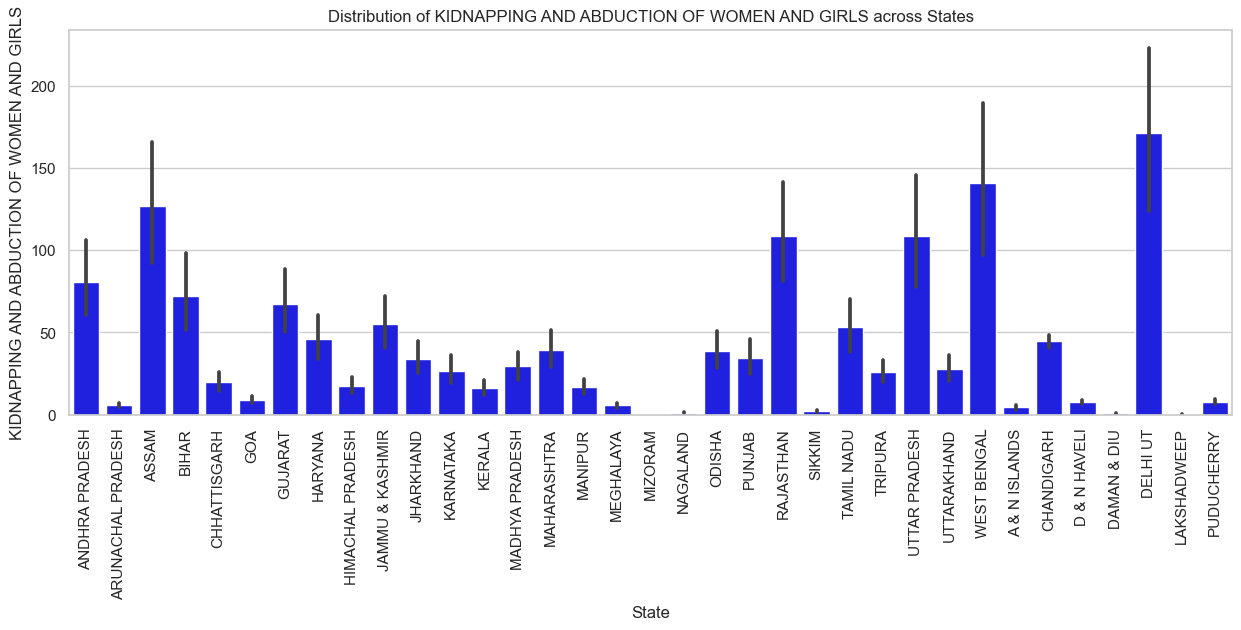

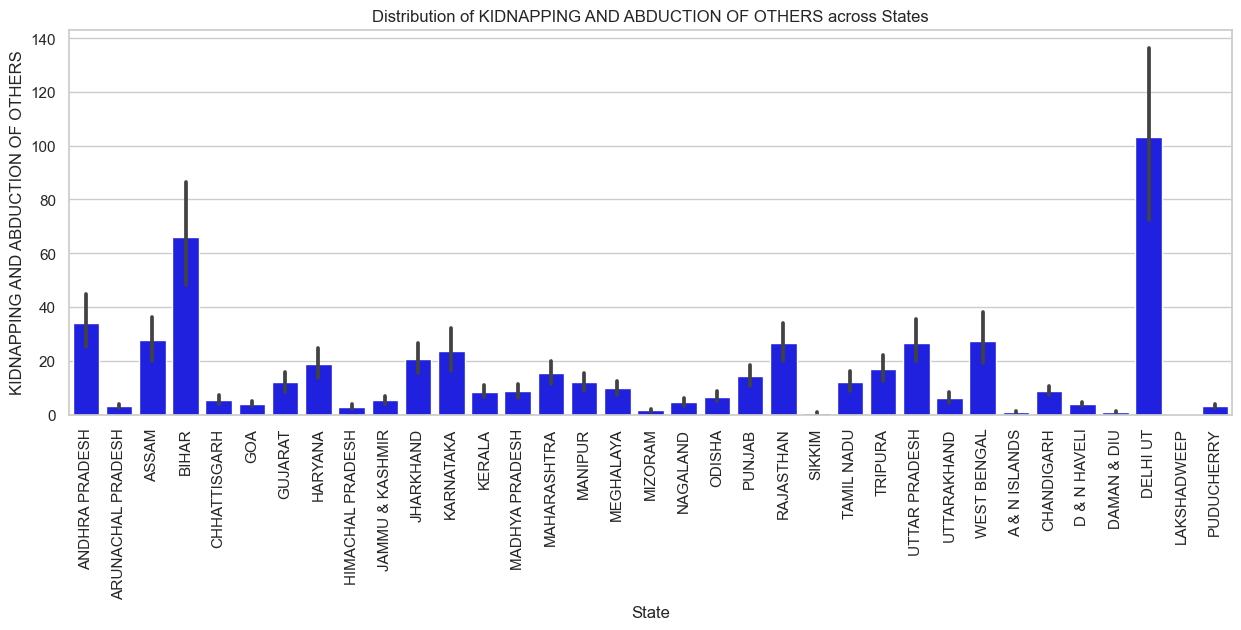

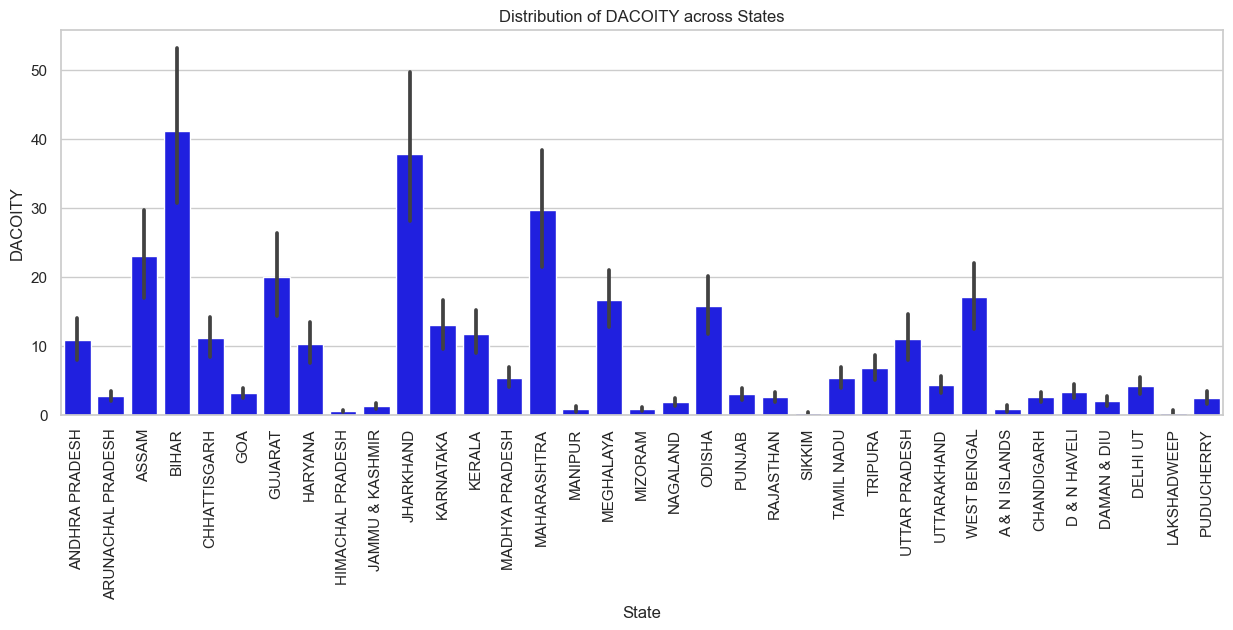

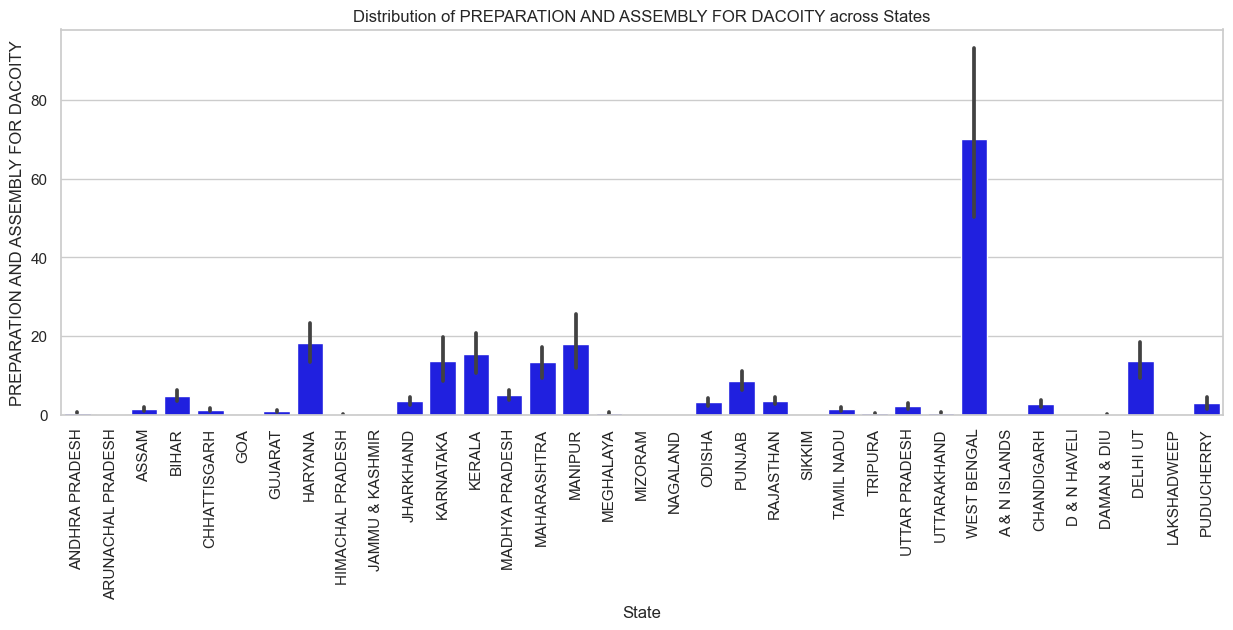

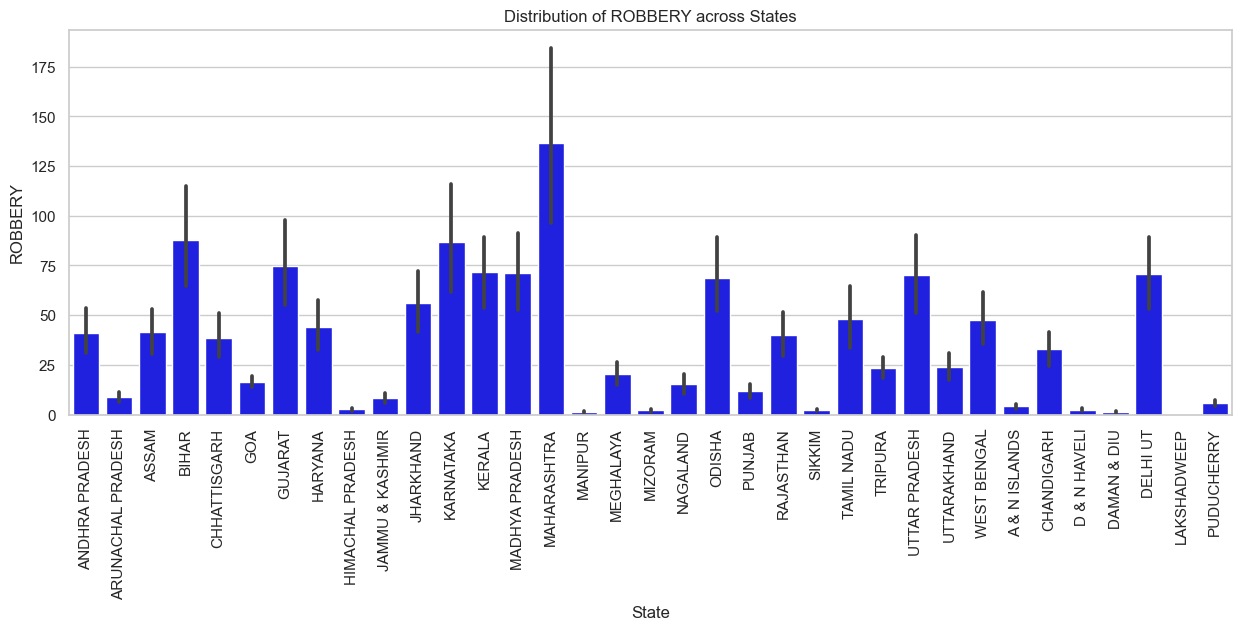

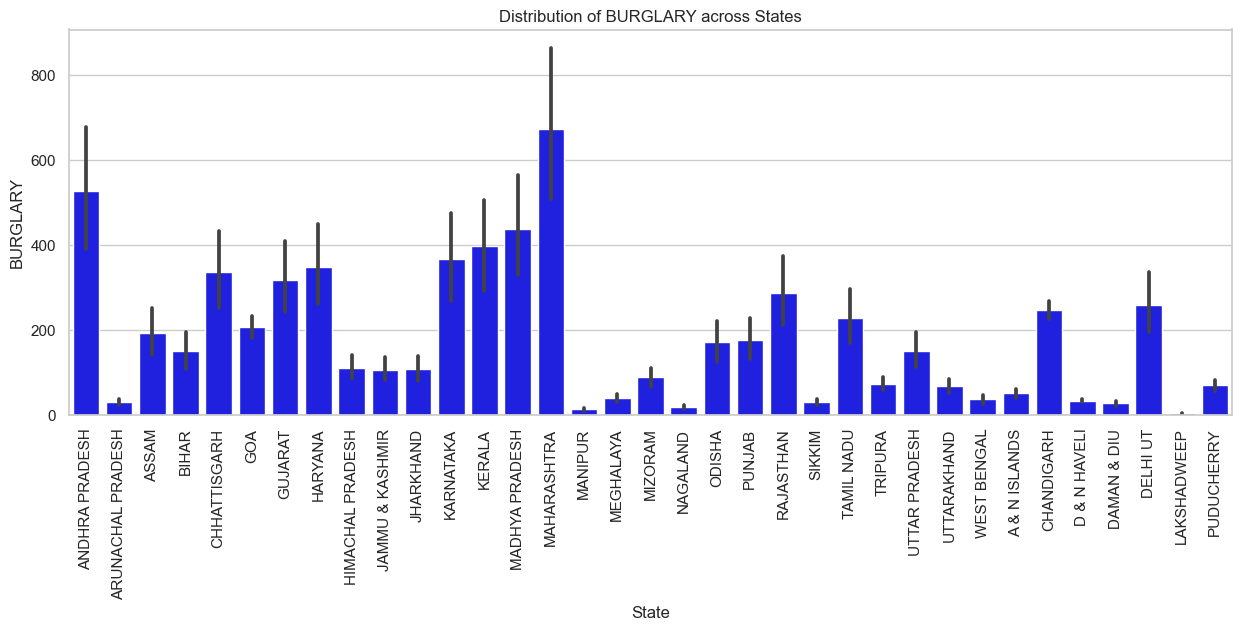

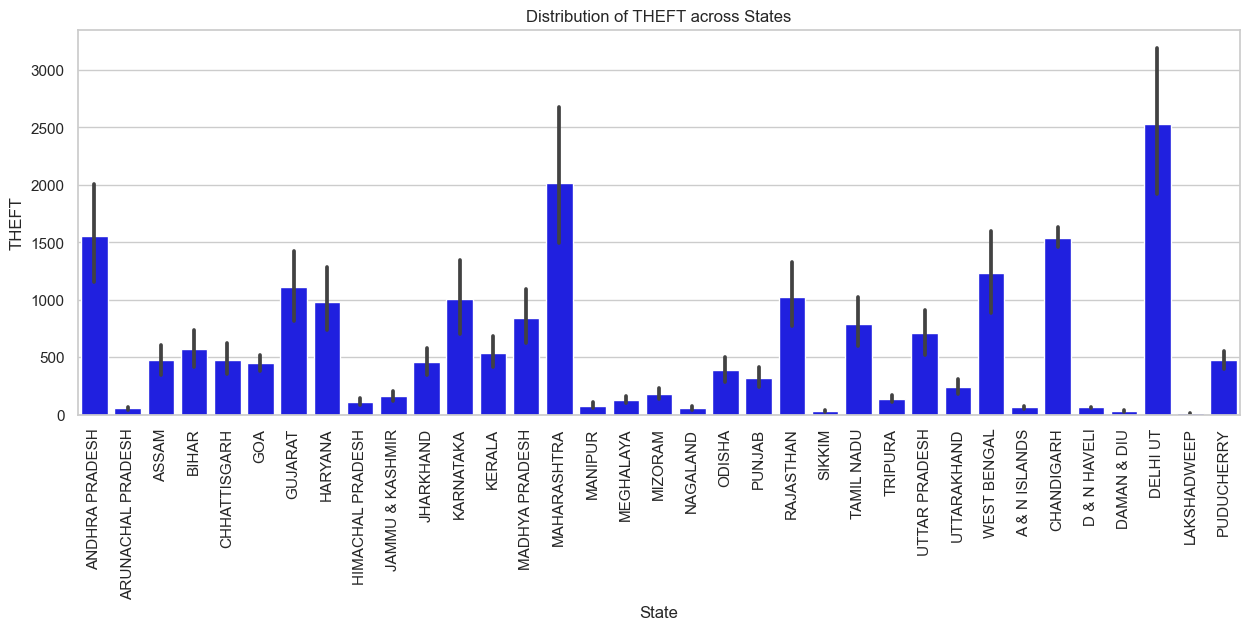

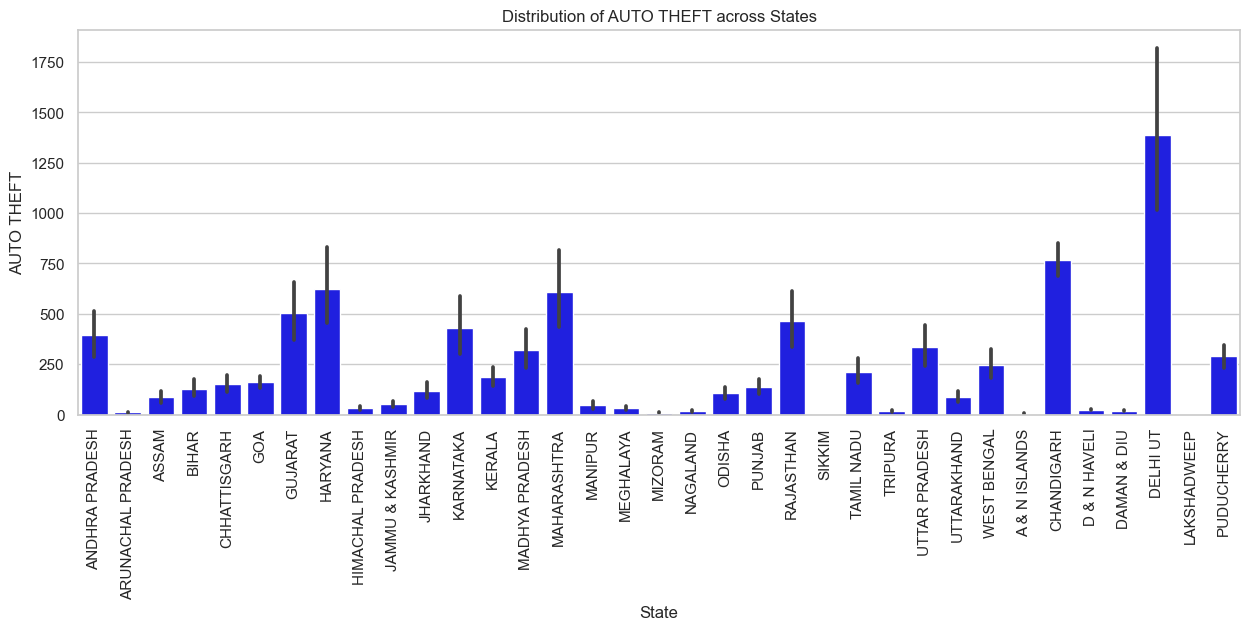

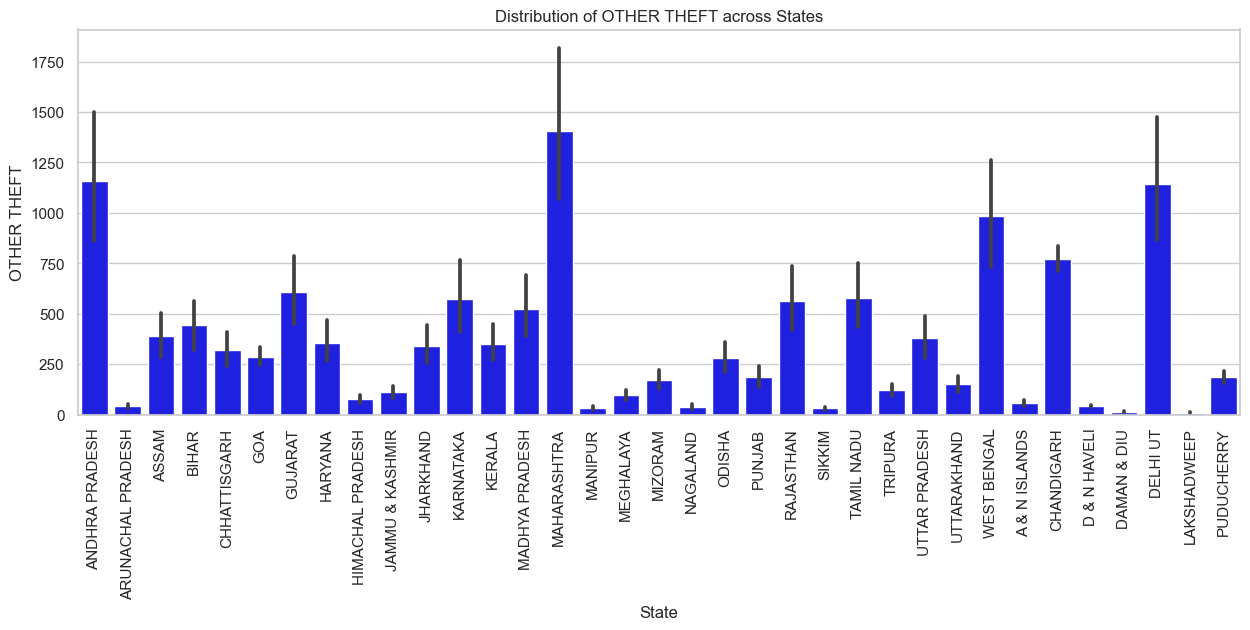

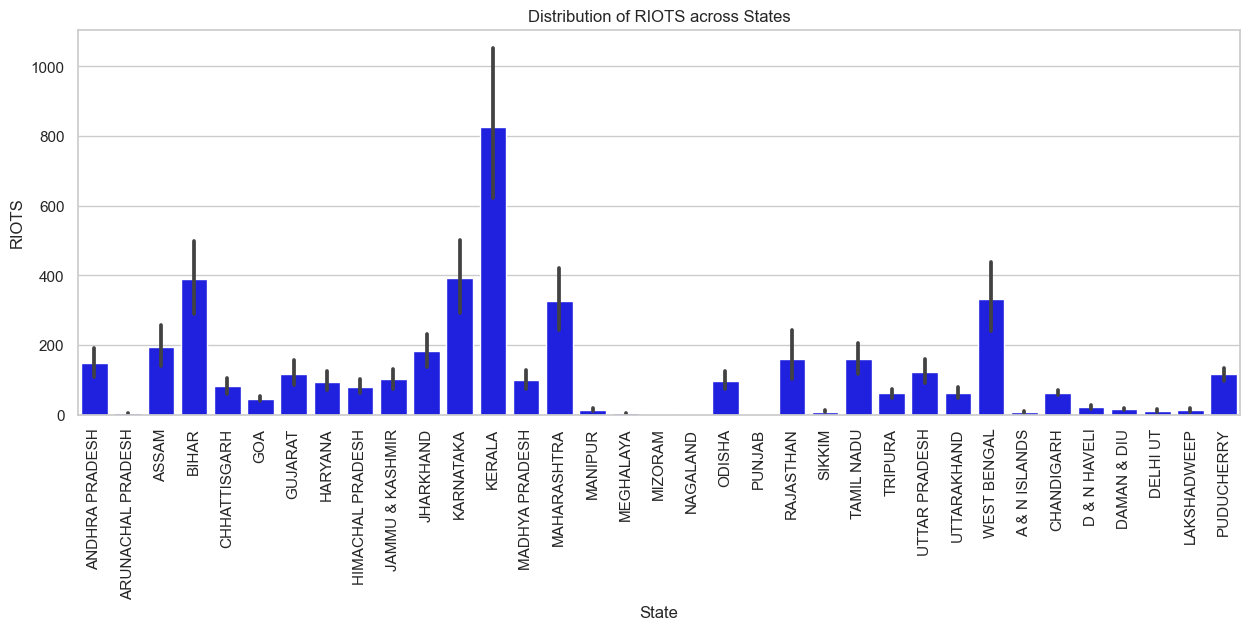

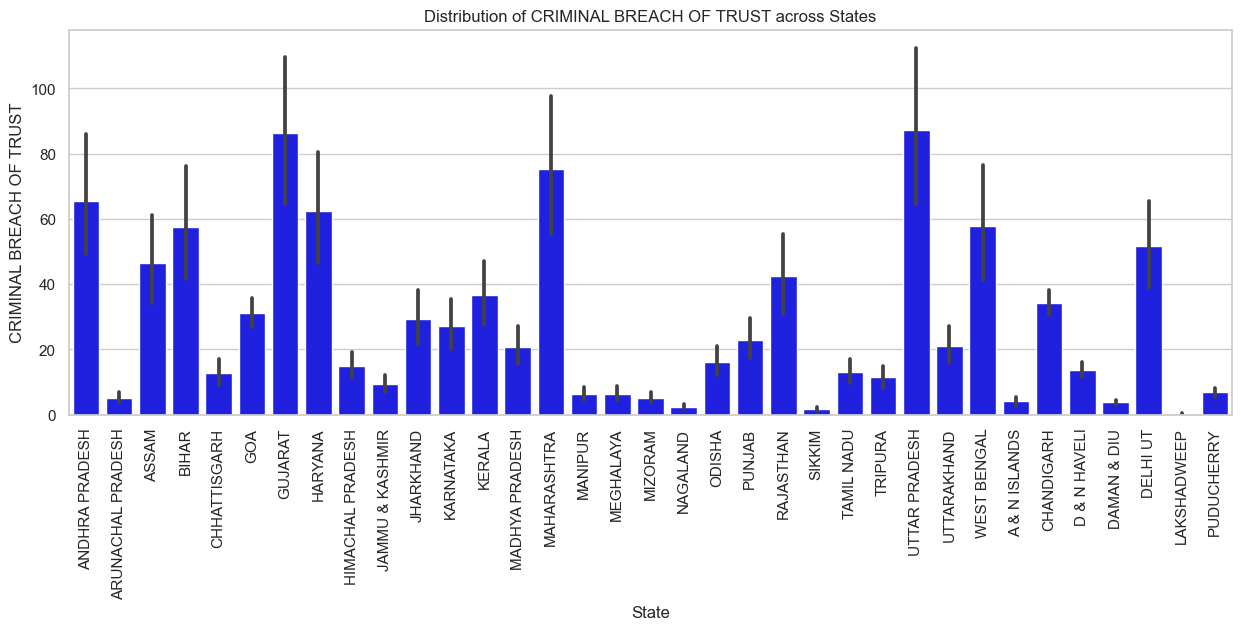

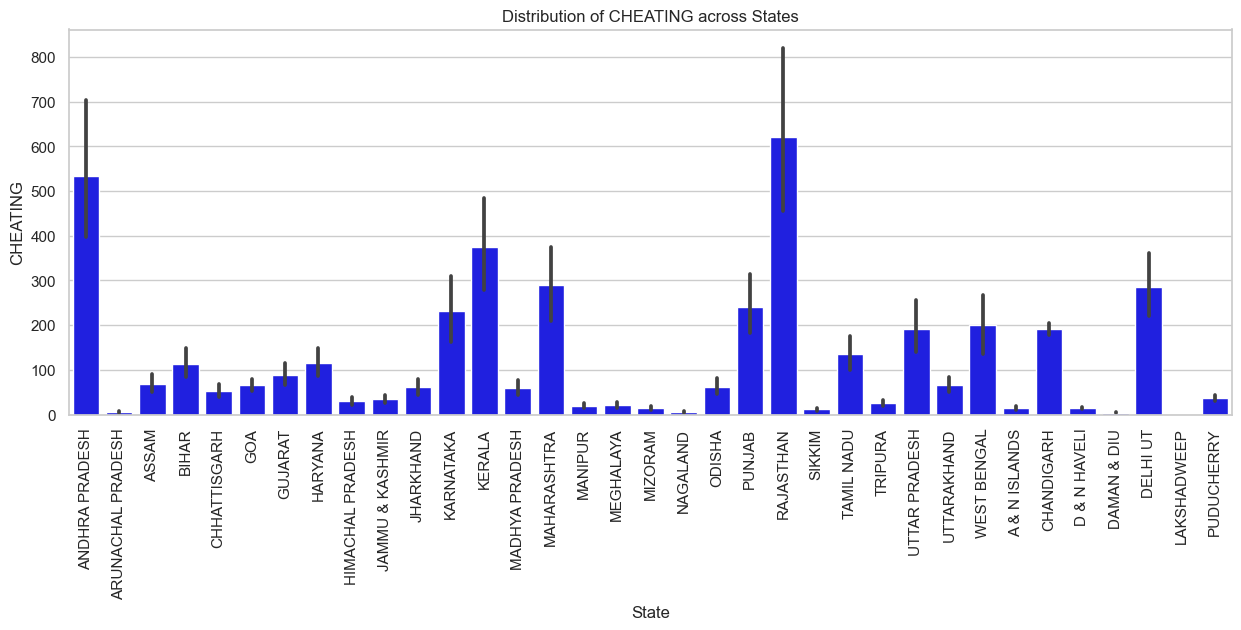

KeyError: 'COUNTERFEITING'

<Figure size 1500x500 with 0 Axes>

In [17]:

# Set the style for better visualization
sns.set(style="whitegrid")
# Plotting each feature
for feature in features:
    plt.figure(figsize=(15, 5))
    sns.barplot(x=crime_data['STATE/UT'], y=crime_data[feature], color='blue')
    plt.title(f'Distribution of {feature} across States')
    plt.xlabel('State')
    plt.ylabel(feature)
    plt.xticks(rotation=90)
    plt.show()


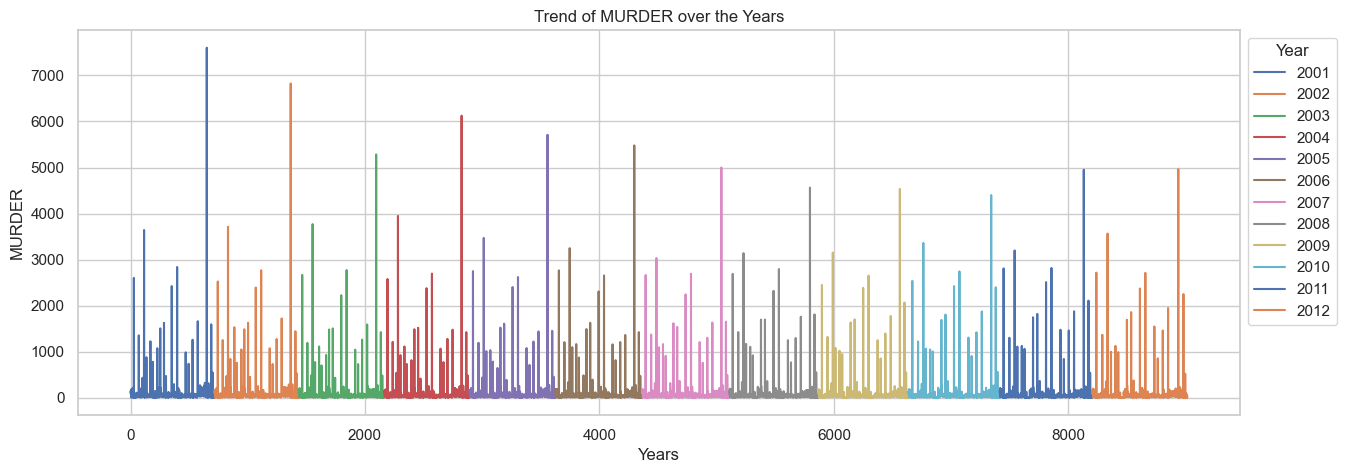

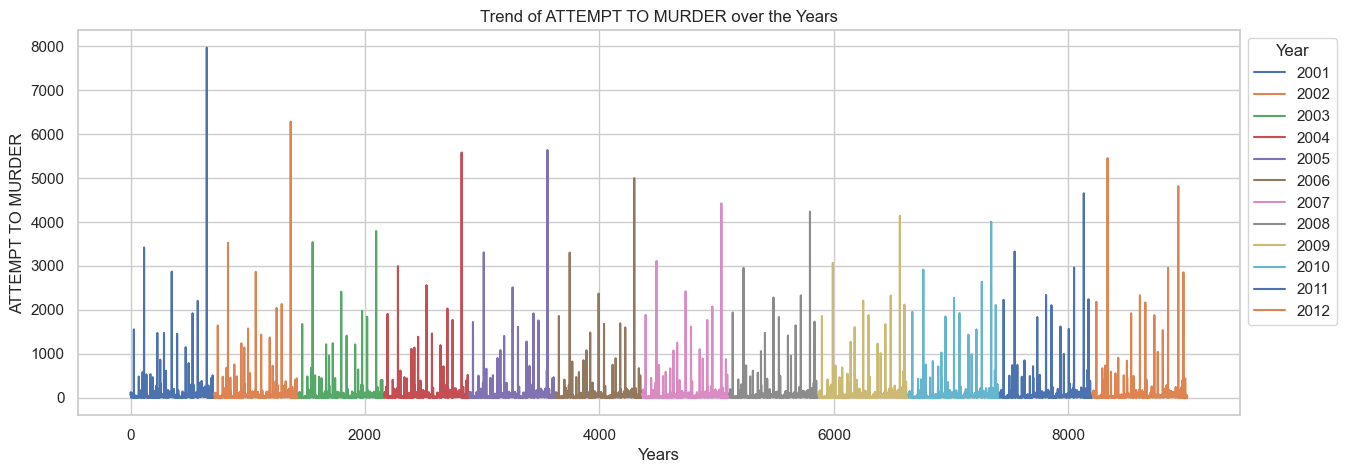

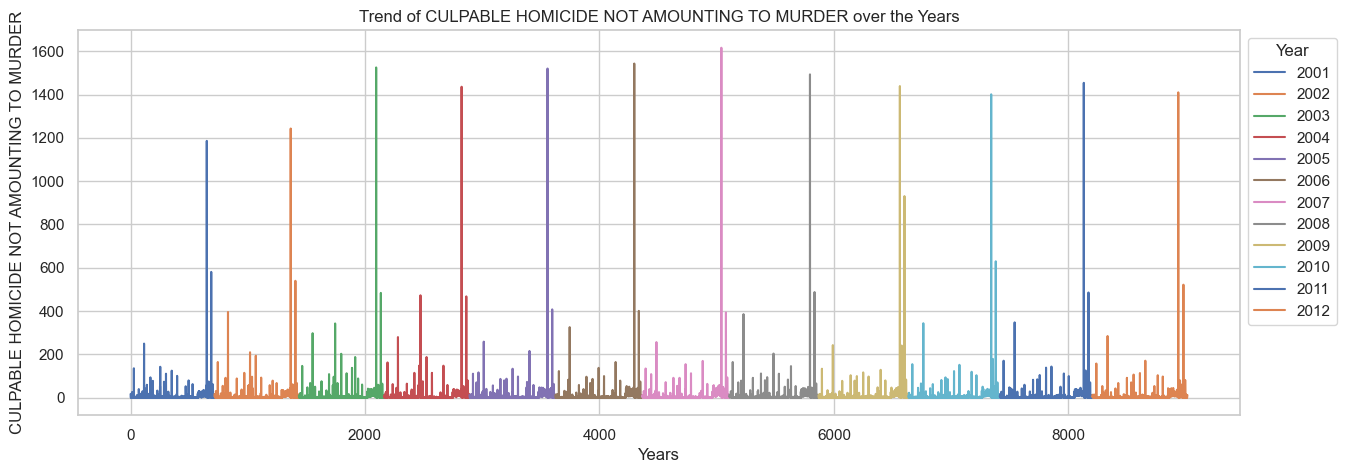

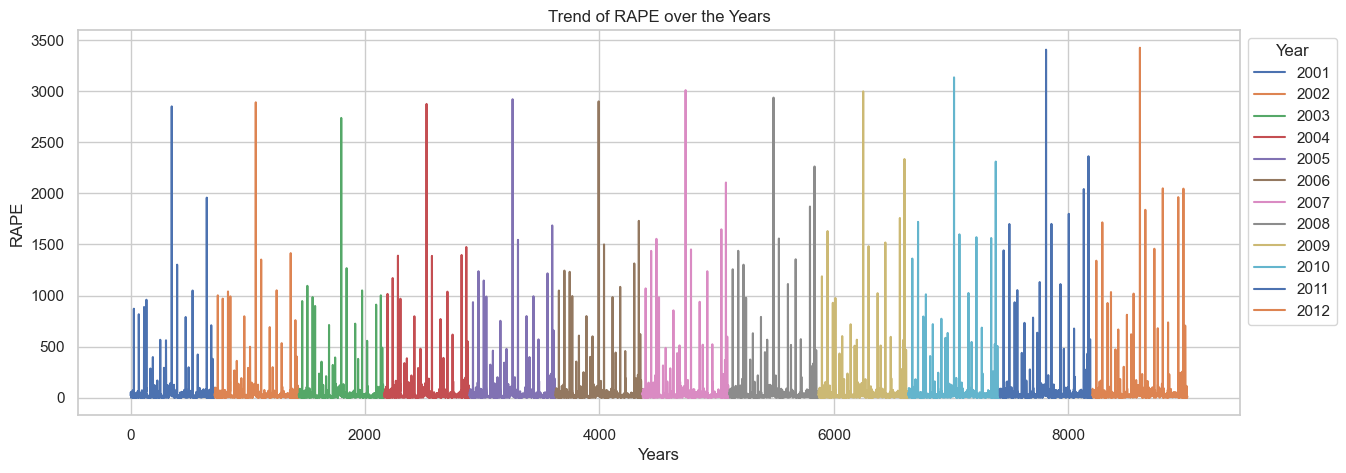

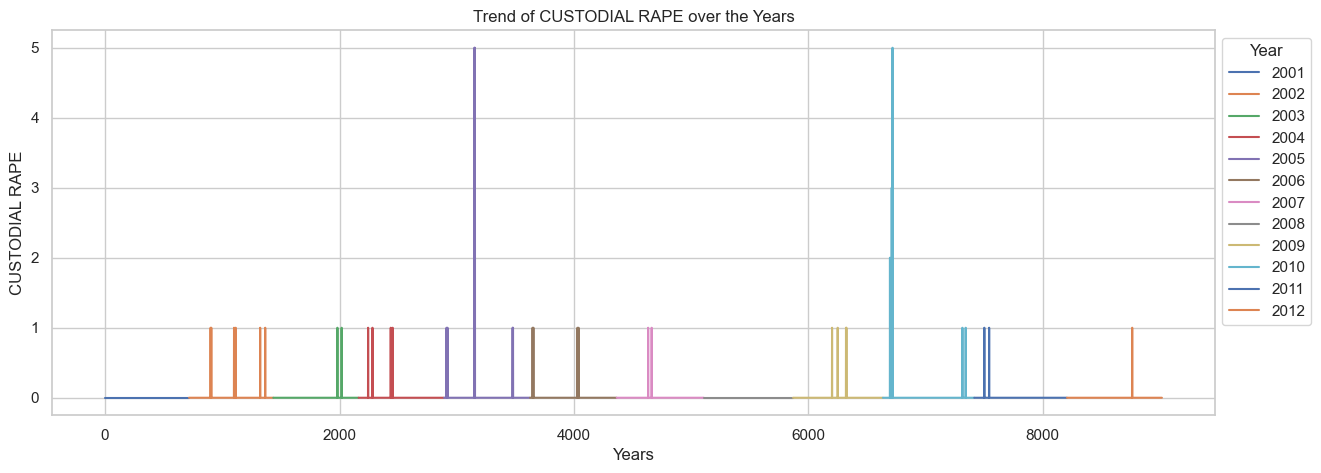

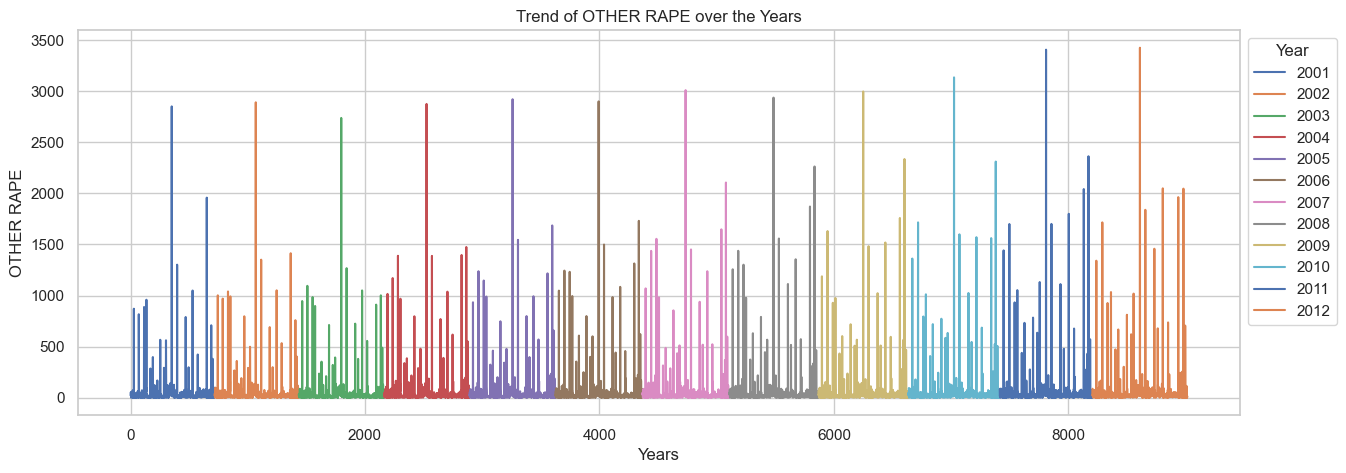

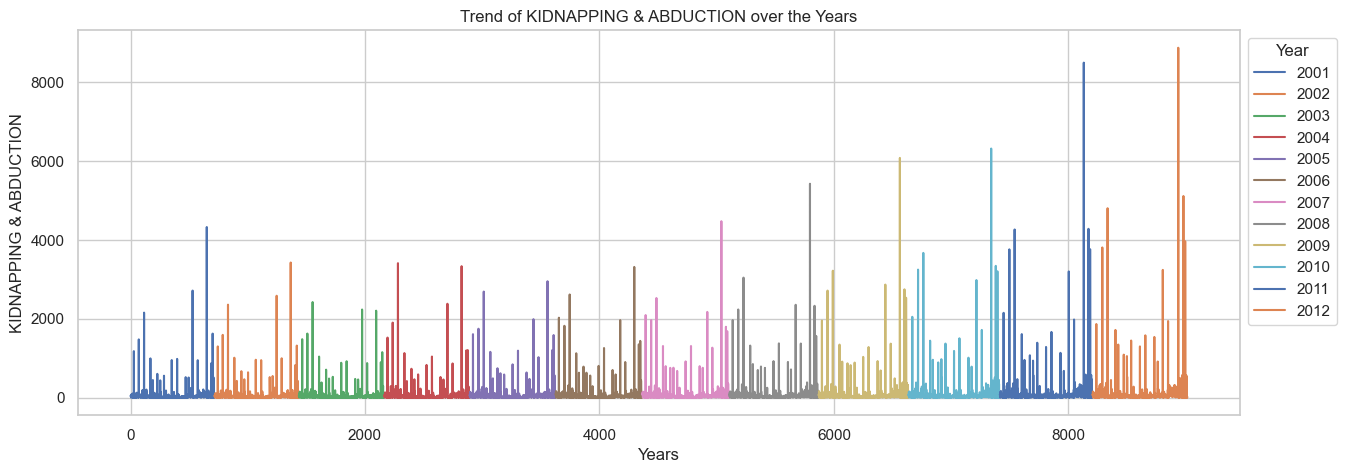

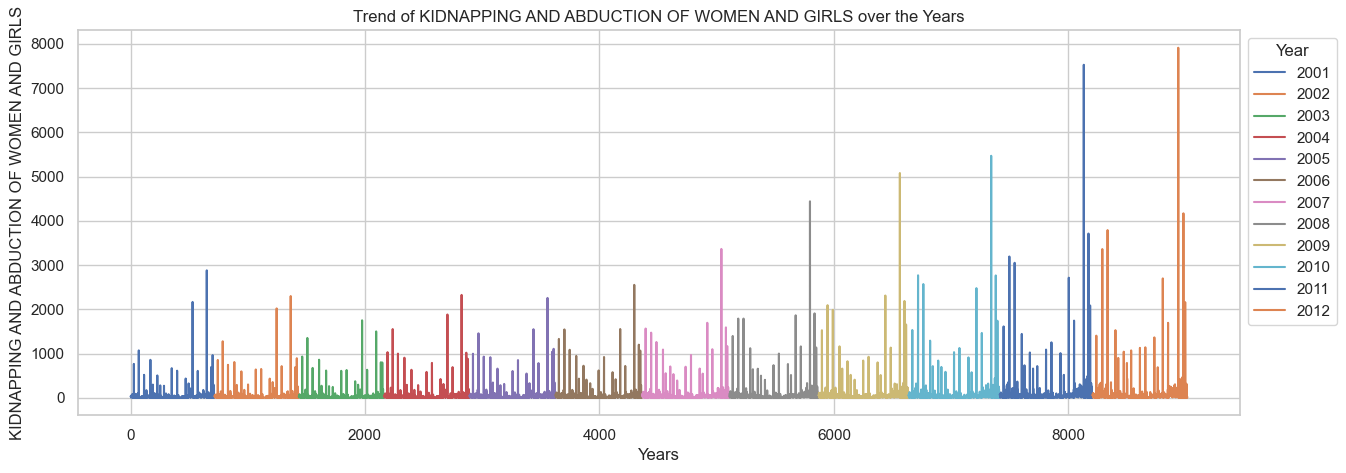

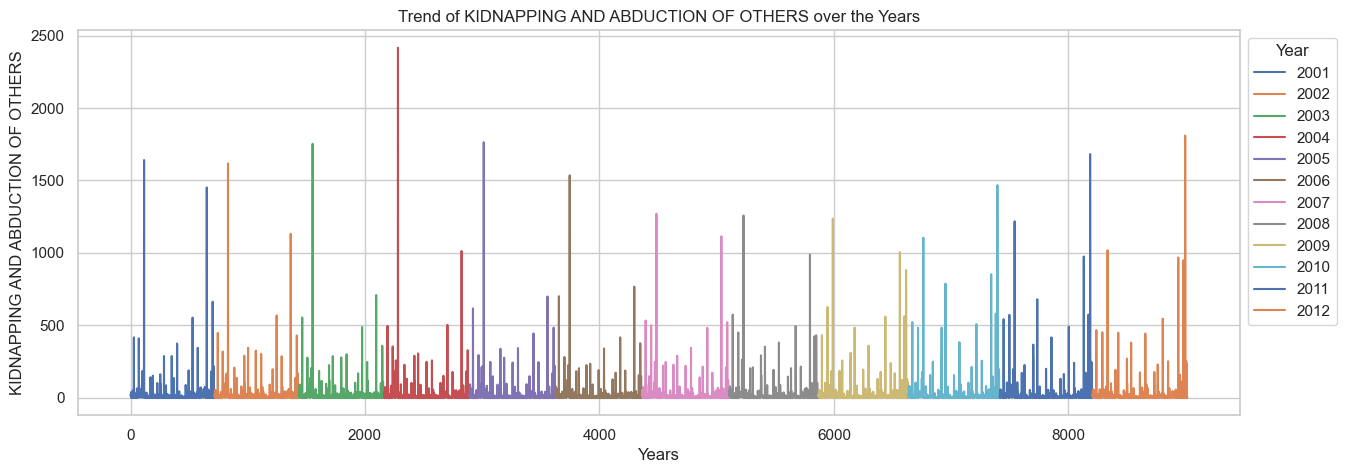

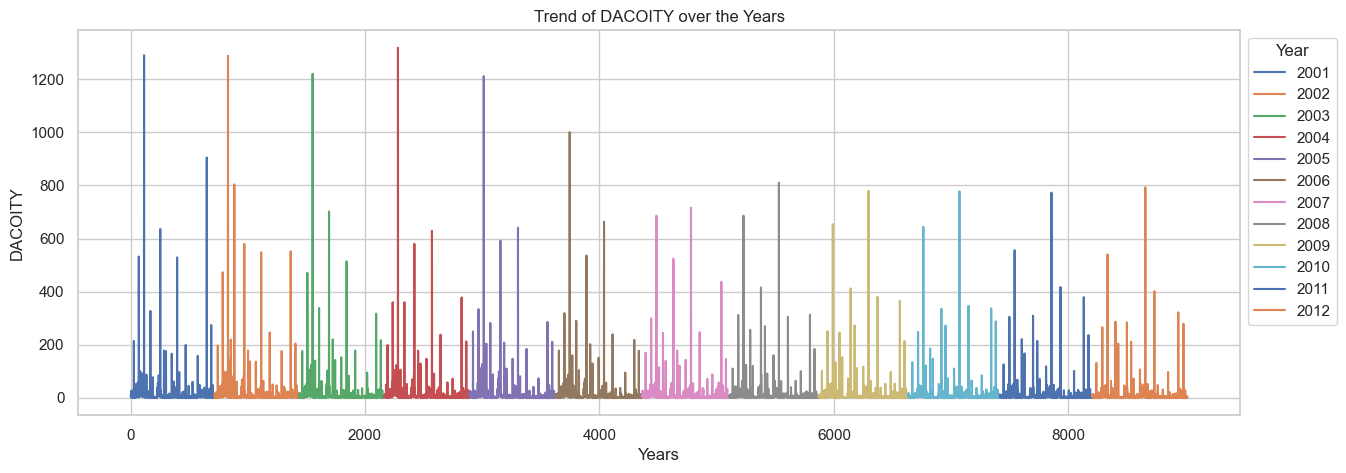

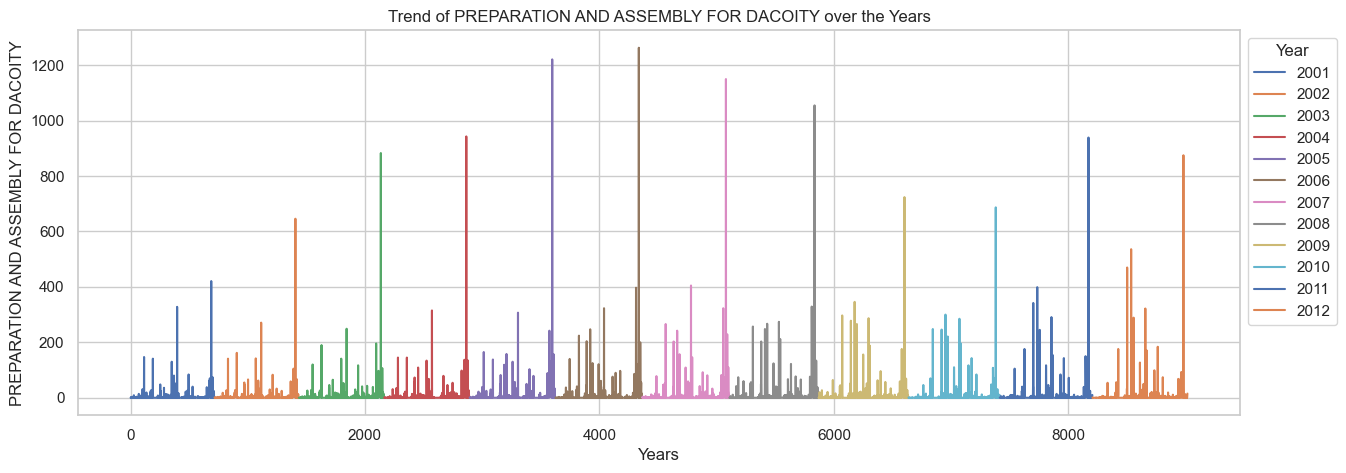

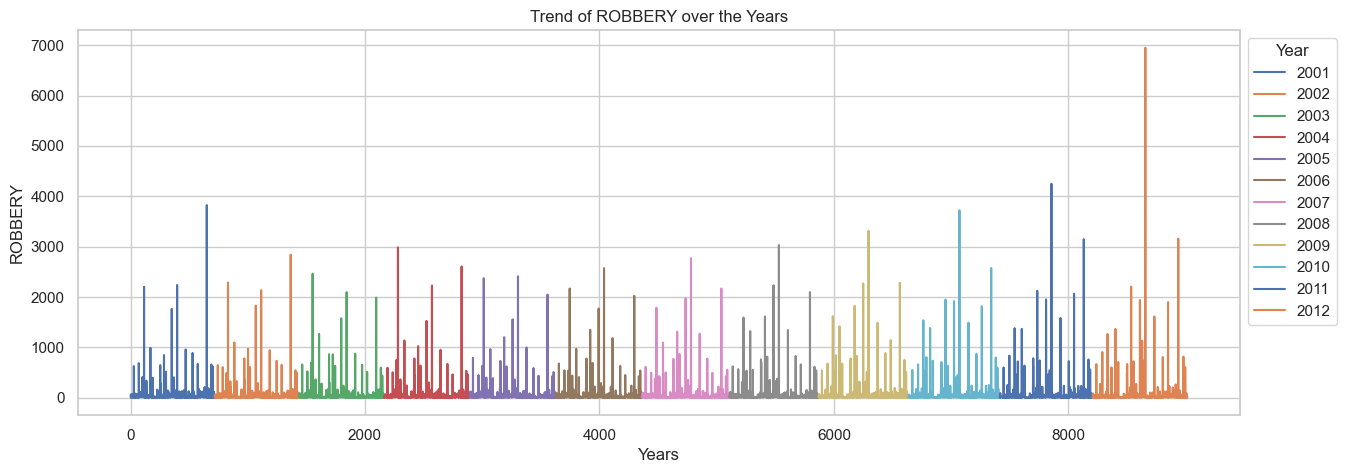

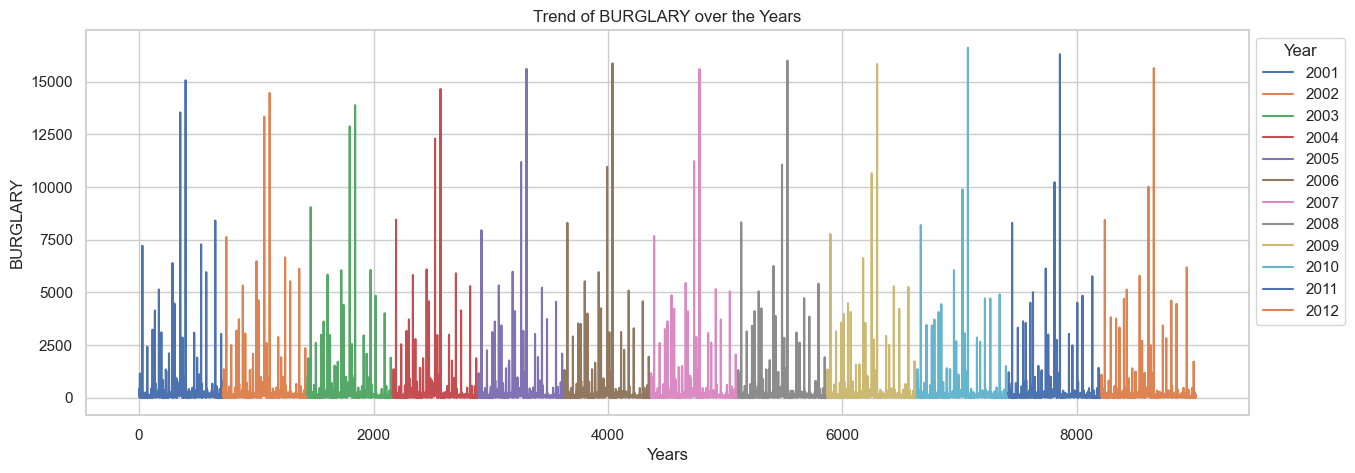

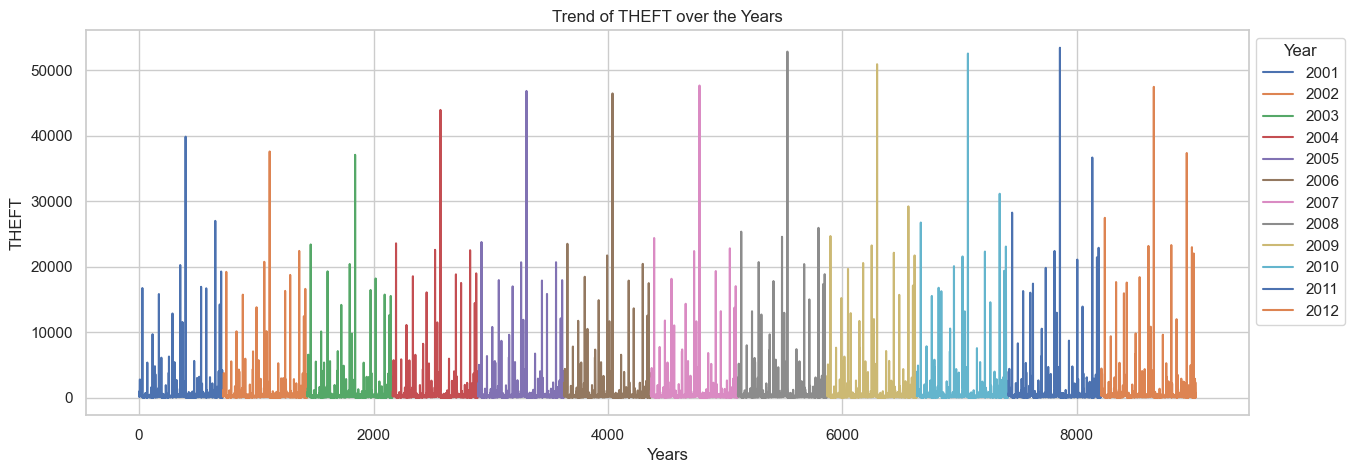

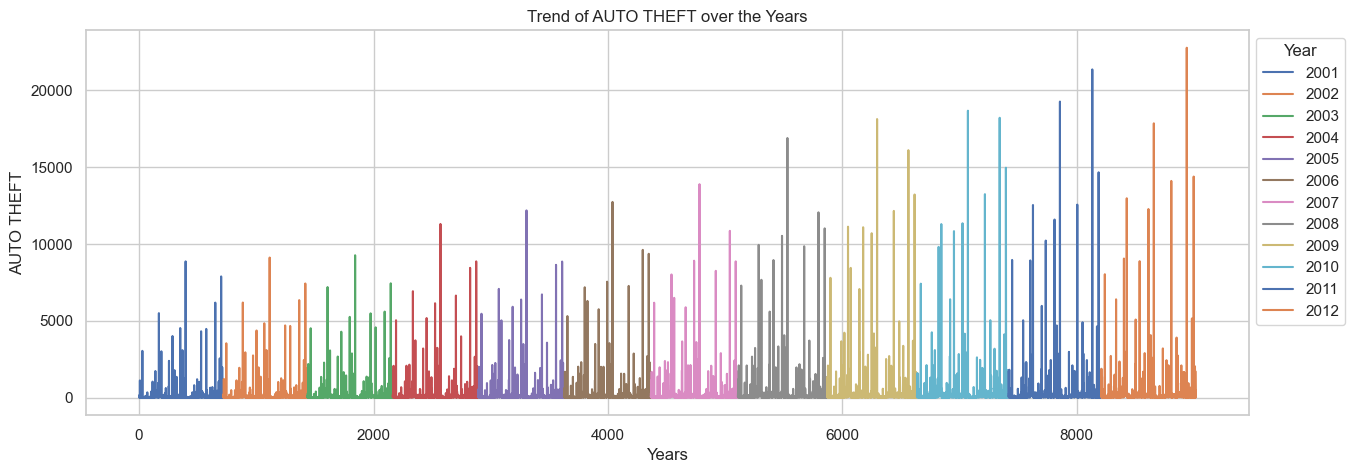

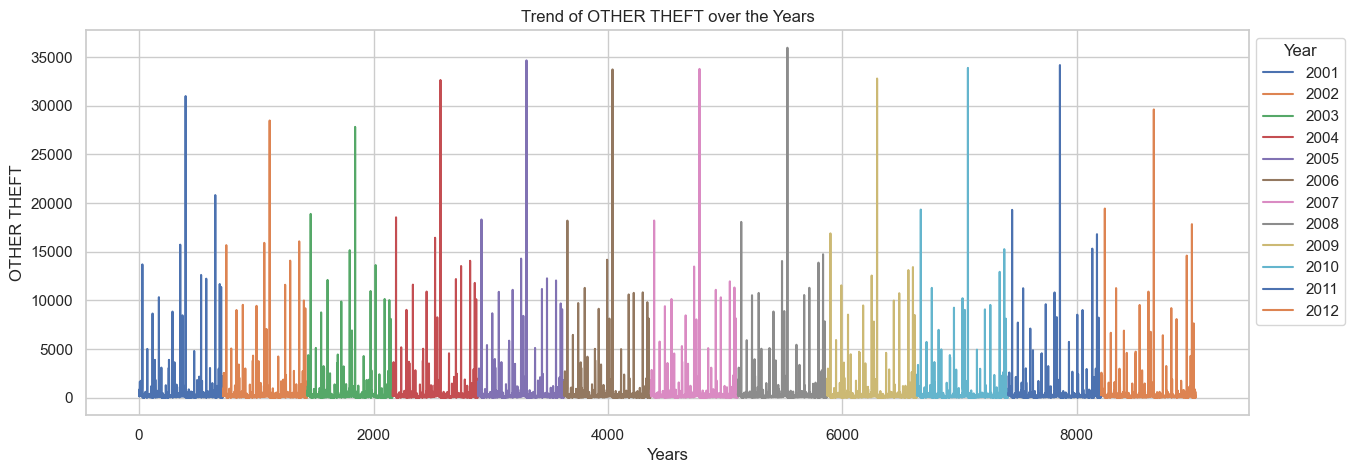

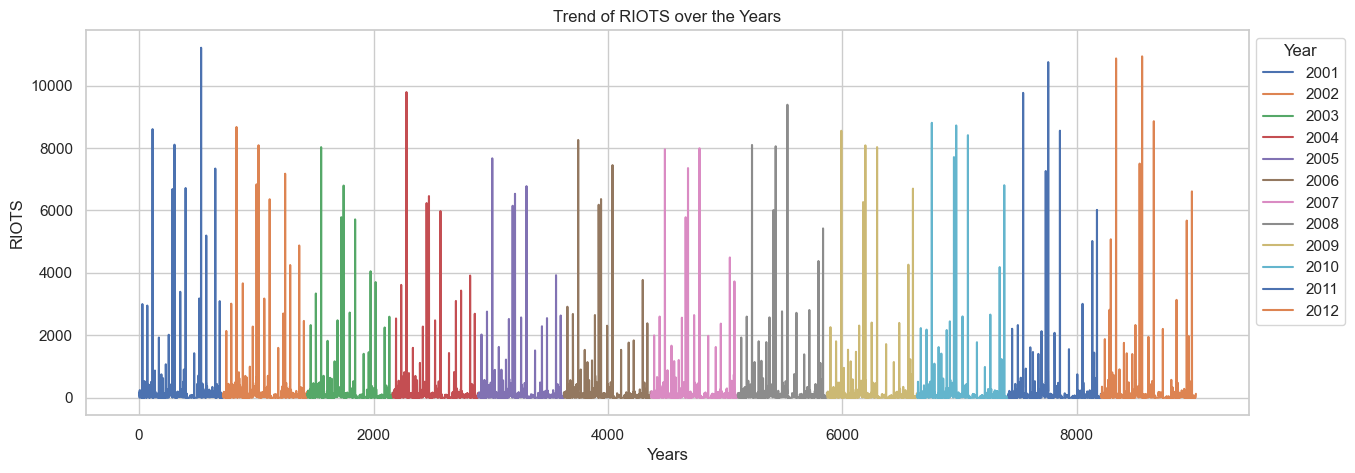

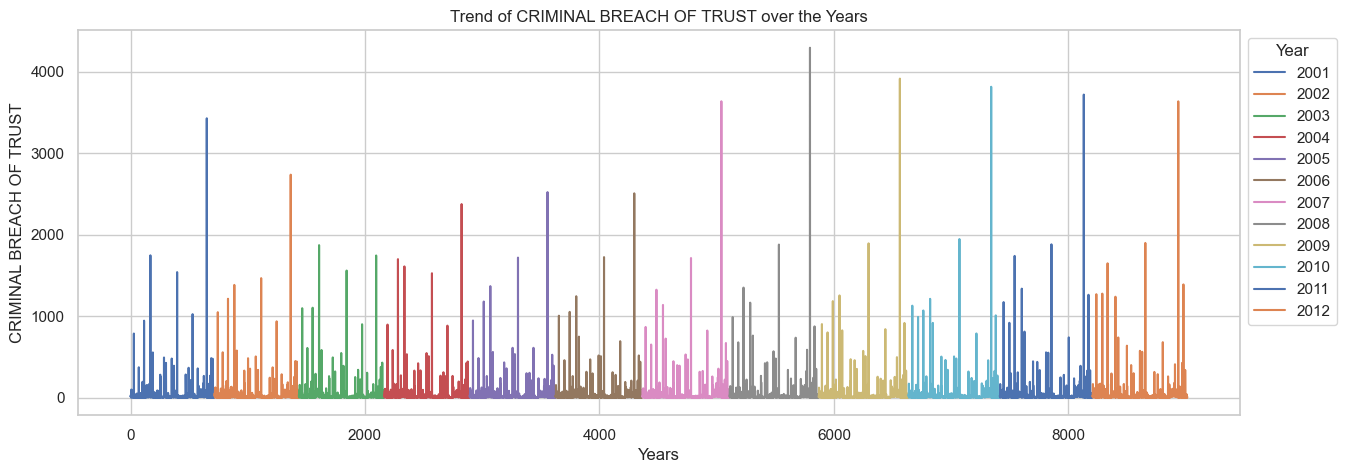

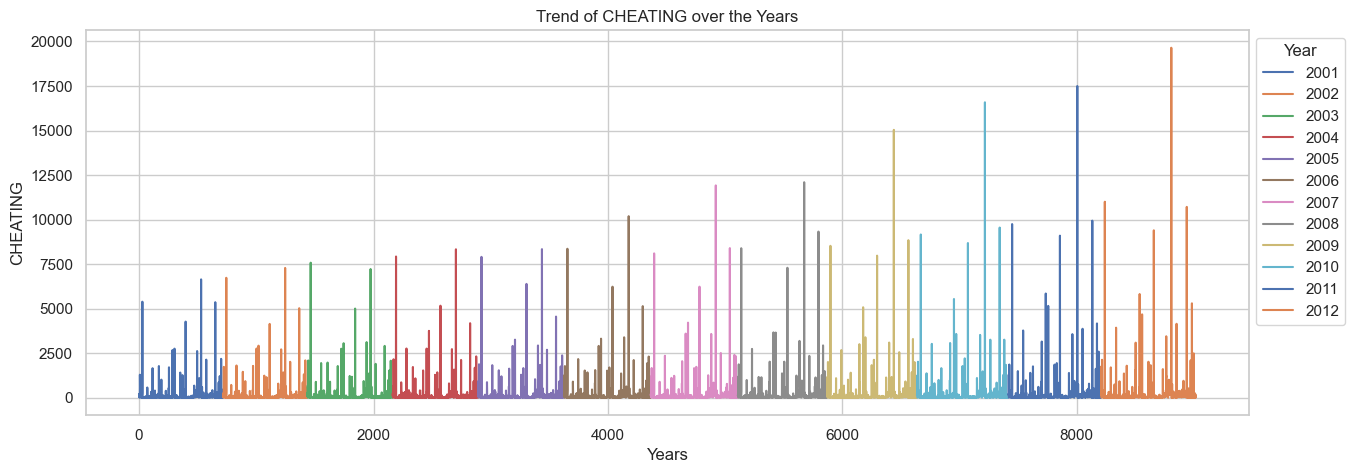

KeyError: 'COUNTERFEITING'

<Figure size 1500x500 with 0 Axes>

In [20]:
years = crime_data['YEAR'].unique()

# Set the style for better visualization
sns.set(style="whitegrid")
# Plotting each feature over the years
for feature in features:
    plt.figure(figsize=(15, 5))
    for year in years:
        data_by_year = crime_data[crime_data['YEAR'] == year]
        plt.plot(data_by_year[feature], label=year)

    plt.title(f'Trend of {feature} over the Years')
    plt.xlabel('Years')
    plt.ylabel(feature)
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### MODEL BULIDING 

In [24]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= crime_data.drop(['STATE/UT','DISTRICT','YEAR'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(9017, 30)

## Using the elbow method to find the optimal number of clusters

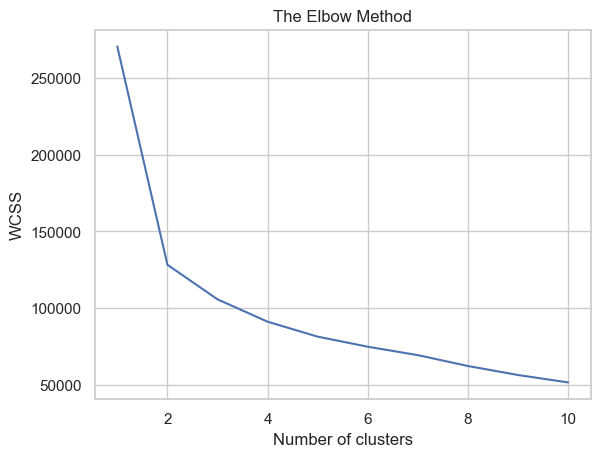

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###  Training the K-Means model on the dataset

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(std_df)

### Visualising the clusters

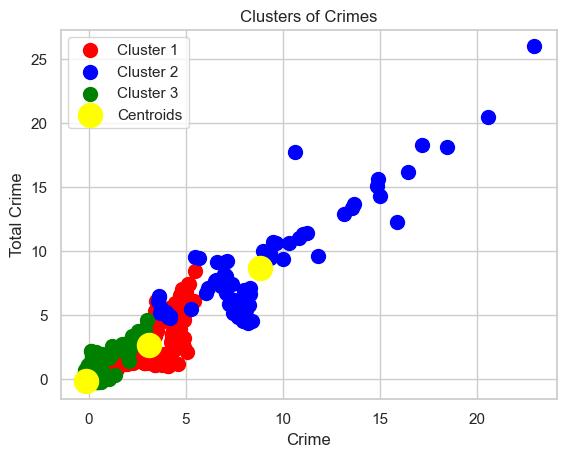

In [35]:
plt.scatter(std_df[y_kmeans == 0, 0], std_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(std_df[y_kmeans == 1, 0], std_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(std_df[y_kmeans == 2, 0], std_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('Crime')
plt.ylabel('Total Crime')
plt.legend()
plt.show()

In [38]:
# Add the cluster labels to the original DataFrame
crime_data['Cluster'] = y_kmeans

In [40]:
# Create DataFrames for each cluster
cluster_dfs = [crime_data[crime_data['Cluster'] == i].drop('Cluster', axis=1) for i in range(3)]

In [41]:
# Analyze and prepare a report for each cluster
for i, cluster_df in enumerate(cluster_dfs):
    print(f"\nCluster {i + 1} - {'Sensitive Areas' if i == 0 else 'Moderate Areas' if i == 1 else 'Peaceful Areas'}:")


Cluster 1 - Sensitive Areas:

Cluster 2 - Moderate Areas:

Cluster 3 - Peaceful Areas:


In [43]:
 # Most unsafe district
most_unsafe_district = cluster_df.loc[cluster_df['TOTAL IPC CRIMES'].idxmax()]
print("\nMost Unsafe District:")
print(most_unsafe_district[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])


Most Unsafe District:
STATE/UT            CHHATTISGARH
DISTRICT                   TOTAL
TOTAL IPC CRIMES           38449
Name: 1574, dtype: object


In [44]:
# Most safe district
most_safe_district = cluster_df.loc[cluster_df['TOTAL IPC CRIMES'].idxmin()]
print("\nMost Safe District:")
print(most_safe_district[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])


Most Safe District:
STATE/UT            DELHI UT
DISTRICT              S.T.F.
TOTAL IPC CRIMES           0
Name: 708, dtype: object


In [46]:
 # Summary statistics
print("Summary Statistics:")
print(cluster_df.describe())
    

Summary Statistics:
              YEAR       MURDER  ATTEMPT TO MURDER  \
count  8805.000000  8805.000000        8805.000000   
mean   2006.628166    48.534810          42.761499   
std       3.463554    52.730615          63.411819   
min    2001.000000     0.000000           0.000000   
25%    2004.000000    18.000000          10.000000   
50%    2007.000000    37.000000          27.000000   
75%    2010.000000    63.000000          54.000000   
max    2012.000000  1075.000000        1474.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                8805.000000  8805.000000     8805.000000   
mean                                    5.344236    28.857240        0.003066   
std                                    10.602197    35.138548        0.078979   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000     8.000000        0.000000   
50%    

## REPORT FOR THIS DATA SET 
Title: Analysis of IPC Crime Data (2001-2012) by District: Trends and Observations

Introduction:
The dataset under consideration, titled "01_District_wise_crimes_committed_IPC_2001_2012," provides a comprehensive overview of crimes registered under the Indian Penal Code (IPC) across various districts. This report aims to highlight key observations derived from the dataset, shedding light on notable trends in crime distribution.

Observations:

* Highest Murder Rates in Andhra Pradesh:
The data reveals that Andhra Pradesh has the highest incidence of murder cases among the studied districts. This alarming trend demands further investigation and focused law enforcement efforts to address the root causes of such criminal activities.

* Attempted Murder Surge in Bihar:
Bihar stands out with a significant number of attempted murder cases, indicating a pressing need for enhanced preventive measures and law enforcement strategies to curb such violent incidents in the state.

* Elevated Rape Cases in Madhya Pradesh and West Bengal:
Madhya Pradesh and West Bengal exhibit higher instances of rape cases, suggesting a critical need for targeted interventions to address the underlying factors contributing to these heinous crimes. Community awareness and support systems could play a crucial role in mitigating this issue.

* Escalation of Kidnapping Cases in Delhi:
Delhi records an alarming number of cases related to kidnapping, emphasizing the urgency for law enforcement agencies to implement robust measures to tackle and prevent such crimes. Collaborative efforts with the community may prove effective in ensuring the safety of residents.

* Proliferation of Robbery Cases in Maharashtra:
Maharashtra emerges as a hotspot for robbery cases, necessitating a focused approach to enhance security measures and law enforcement efforts. Public awareness campaigns and community policing initiatives could contribute to reducing the prevalence of robbery in the state.